In [75]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import scipy.ndimage as img
import scipy.signal as sig
import scipy.special as spec
from PIL import Image, ImageDraw, ImageFont
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["figure.figsize"] = (5,5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"

In [4]:
class ImgModel:
    """
    The ImgModel class makes it easier to generate circular apertures, 
    images with text using only Python, and simulating an imaging system
    based on these generated elements. This eliminates the need to keep
    rewriting similar code.
    """
    
    
    def generate_aperture(rad=0.5, res=500):
        """
        Generate a binary circular aperture
        
        Parameters
        ----------
        rad : float
            radius of the aperture relative to the size of the image
        res : int
            resolution of the image meshgrid
            
        Returns
        -------
        Z : array_like
            numpy array containing the aperture
        """
        t = np.linspace(-1, 1, res)
        X, Y = np.meshgrid(t,t)
        R = np.hypot(X, Y)
        Z = np.zeros((res, res))
        Z[R <= rad] = 1
        Z = np.round(Z/Z.max() * 255).astype("uint8")
        return Z
        
        
    def generate_txtImage(x, y, dims=512, text=None, fontsize=256, 
                          fontcolor="white", bgcolor="black", 
                          supersample=True, superes=128):
        """
        Generate an image with text in-program
        
        Parameters
        ----------
        x : int
            x-location of the upper-left corner of text
        y : int
            y-location of the upper-left corner of text
        dims : int
            (square) dimensions of the image
        text : str
            text to be put in the image
        fontsize : float
            size of text
        fontcolor : str
            color of text
        bgcolor : str
            color of image background
        supersample : bool
            whether or not to supersample the image to reduce aliasing.
            Supersampled dimension is given by the dims parameter, and the 
            final size is given by the superes parameter
        superes : int
            final downscaled size of image after supersampling. Will be
            ignored if supersample is false
            
        Returns
        -------
        a : array_like
            numpy array containing the image with text, of size dims x dims
            if supersample is True; size superes x superes otherwise
        """
        a = Image.new("L", (dims, dims), color=bgcolor)
        fnt = ImageFont.truetype("C:/Windows/Fonts/Arial.ttf", fontsize)
        d = ImageDraw.Draw(a)
        d.text((x, y), text, font=fnt, fill=fontcolor)
        if supersample:
            a = a.resize((superes, superes), Image.ANTIALIAS)
        a = np.array(a, "uint8")
        return a
    
    def image_aperture(obj, aper):
        """
        Simulate imaging device. Inputs should ideally be the outputs of
        generate_aperture() and generate_txtImage(), and should be of
        the same size
        
        Parameters
        ----------
        obj : array_like
            Output of generate_txtImage(), or any other image with the same
            dimensions as aper
        aper : array_like
            Output of generate_aperture, or any other aperture with the
            same dimensions as obj
            
        Returns
        -------
        FImage : array_like
            Image formed by multiplying the FTs of obj and aper
        """
        Faper = fft.fftshift(aper)
        Fobj = fft.fft2(obj)
        FRA = Faper*Fobj
        IRA = abs(fft.fft2(FRA))
        FImage = np.round(IRA/IRA.max() * 255).astype("uint8")
        return FImage
    
def uint8(X):
    """
    Convert input data type to 8-bit unsigned integer
    """
    return np.round(abs(X)/abs(X).max() * (2**8 - 1)).astype("uint8")

def fftcircle(Z, r, h, k, **kwargs):
    """
    Draw a circle on an existing image
    
    Parameters
    ----------
    Z : PIL.Image
        An instance of a blank or pre-existing PIL.Image object
    r : int
        radius of circle
    h : int
        x-location of center of circle
    k : int
        y-location of center of circle        
    """
    draw = ImageDraw.Draw(Z)
    draw.ellipse((h-r, k-r, h+r, k+r), **kwargs)

def fftsquare(Z, r, h, k, **kwargs):
    """
    Draw a square on an existing image
    
    Parameters
    ----------
    Z : PIL.Image
        An instance of a blank or pre-existing PIL.Image object
    r : int
        half-length of a side of the square
    h : int
        x-location of center of square
    k : int
        y-location of center of square     
    """
    draw = ImageDraw.Draw(Z)
    draw.rectangle((h-r, k-r, h+r, k+r), **kwargs)
    
def fftgauss(X, Y, mux, muy, sigma):
    """
    Generate a 2D Gaussian
    
    Parameters
    ----------
    X : array_like
        meshgrid of x values
    Y : array_like
        meeshgrid of y values
    mux : float
        x-location of mean
    muy : float
        y-location of mean
    sigma : float
        standard deviation of the gaussian
    """
    return np.exp(-((X - mux/len(X))**2 + (Y - muy/len(Y))**2)**2/sigma**2)

1. Rank (from highest to lowest) the test patterns below according to peak correlation values that will be obtained with the target pattern in the first column. (15 pts)


| Target | TEST1 | TEST2 | TEST3 | TEST4 | TEST5 | TEST6 | TEST7 |
| :----: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| B      | I     | P     | 8     | H     | X     | E     | 0     |

In [5]:
target = ImgModel.generate_txtImage(128, 174, 512, "B", 65, "black", 
                                  "white", True, 512)
testI = ImgModel.generate_txtImage(128, 174, 512, "I", 65, "black", 
                                  "white", True, 512)
testP = ImgModel.generate_txtImage(128, 174, 512, "P", 65, "black", 
                                  "white", True, 512)
test8 = ImgModel.generate_txtImage(128, 174, 512, "8", 65, "black", 
                                  "white", True, 512)
testH = ImgModel.generate_txtImage(128, 174, 512, "H", 65, "black", 
                                  "white", True, 512)
testX = ImgModel.generate_txtImage(128, 174, 512, "X", 65, "black", 
                                  "white", True, 512)
testE = ImgModel.generate_txtImage(128, 174, 512, "E", 65, "black", 
                                  "white", True, 512)
test0 = ImgModel.generate_txtImage(128, 174, 512, "0", 65, "black", 
                                  "white", True, 512)

test = [testI, testP, test8, testH, testX, testE, test0]
testlabel = ["testI", "testP", "test8", "testH", "testX", "testE", "test0"]

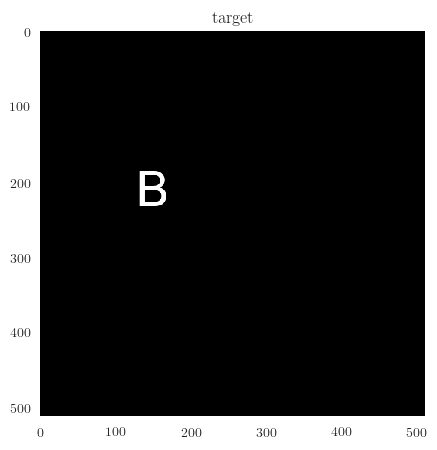

D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\scipy\fftpack\basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


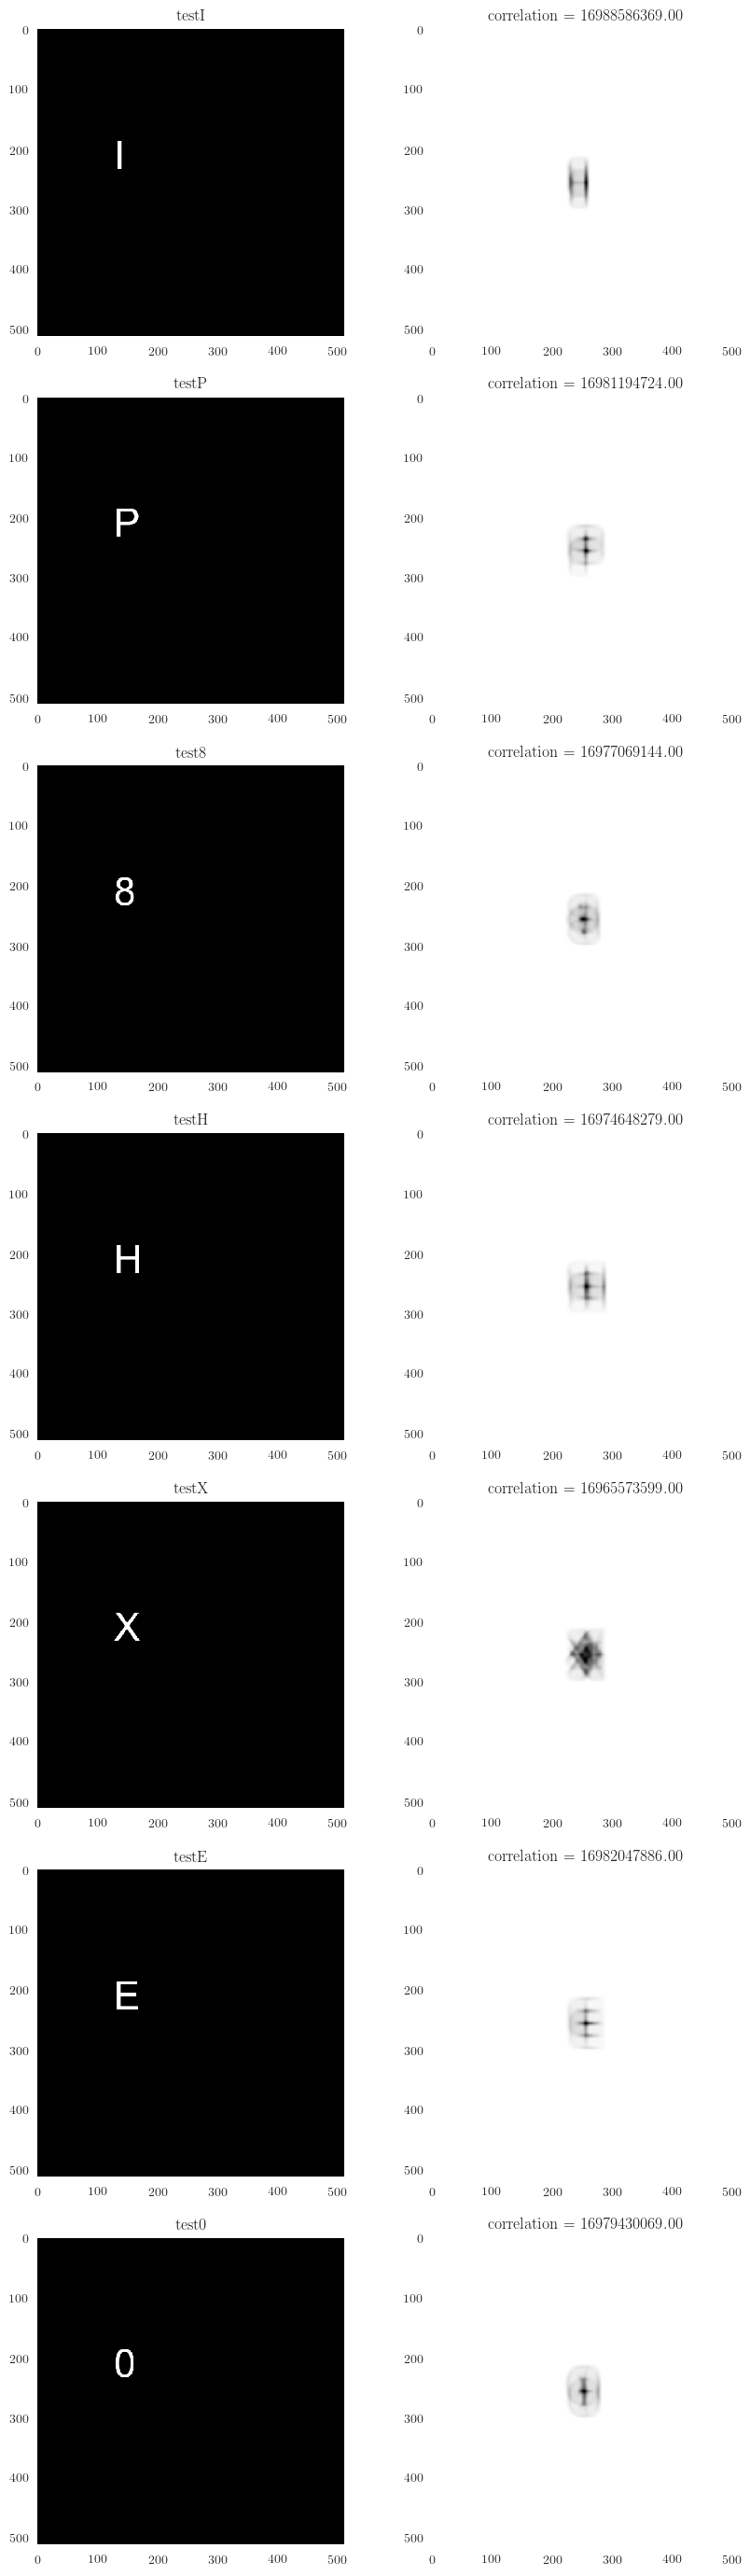

In [6]:
mp.imshow(target)
mp.grid(False)
mp.title("target")
mp.show()

corrlist = []
fig = mp.figure(figsize=(5*2, 5*7))

for i in range(len(test)):
    ax = fig.add_subplot(7, 2, 2*(i+1) - 1)
    ax.imshow(test[i])
    ax.grid(False)
    ax.set_title(testlabel[i])

    ax = fig.add_subplot(7, 2, 2*(i+1))
    Ftarget = fft.fft2(target)
    Ftest = fft.fft2(test[i])
    Fmatch = Ftest * Ftarget.conj()
    Fimg = fft.fftshift(abs(fft.ifft2(Fmatch)))
    ax.imshow(Fimg)
    corr = abs(Fimg).max()
    corrlist.append(corr)
    ax.set_title("correlation = %.2f"%(corr))

mp.show()

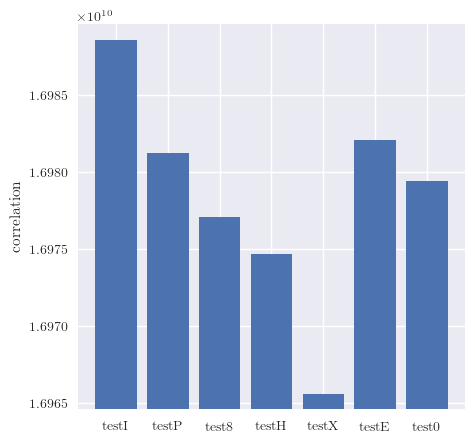

In [7]:
# mp.plot(corrlist, "o")
mp.bar(range(len(corrlist)), corrlist)
mp.xticks(range(len(corrlist)), testlabel)
mp.ylabel("correlation")
mp.ylim(min(corrlist)-1e6, max(corrlist)+1e6)
mp.show()

2. A diffraction pattern is described as four Airy patterns centered at `(-2,2)`, `(2,2)`, `(2,-2)` and `(-2,-2)`. Sketch the pattern then express ANALYTICALLY the Fourier Transform of the diffraction pattern. (20 pts)

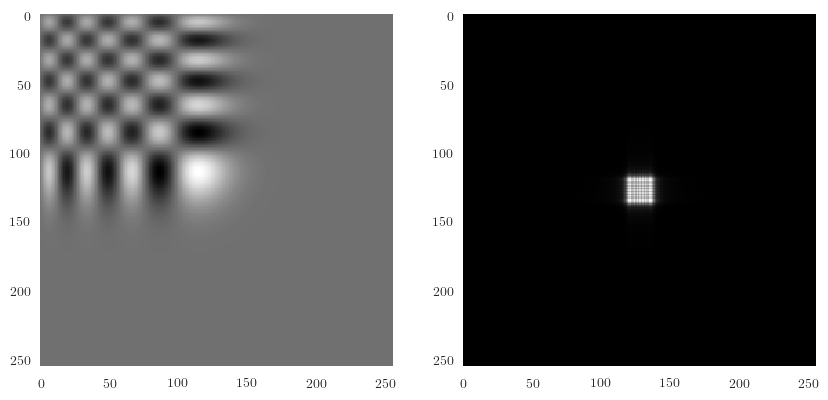

In [158]:
# N = 256
t = np.linspace(-10, 10, N)
R = np.meshgrid(t,t)
Z = spec.airy(R)[0]
Z = Z[0] * Z[1]

fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
ax.imshow(Z, "gray")
ax.grid(False)

ax = fig.add_subplot(122)
FZ = fft.fft2(Z)
ax.imshow(abs(fft.fftshift(FZ)), "gray")
ax.grid(False)

mp.show()

3. Sketch the Fourier Transform of the aperture shown below. (15 pts)

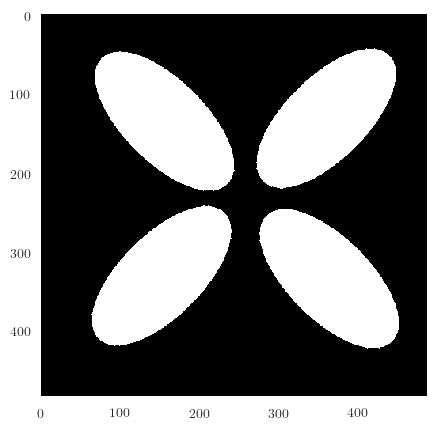

In [159]:
data = img.imread("exam1.png", mode="L")

for i in range(len(data)):
    for j in range(len(data.T)):
        if data[i,j] <= 128:
            data[i,j] = 0
        else:
            data[i,j] = 1
            
mp.imshow(data, "gray")
mp.grid(False)
mp.show()

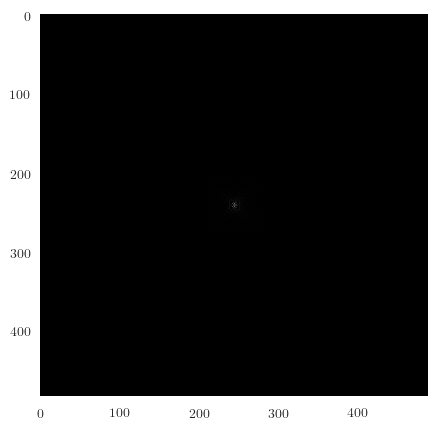

In [161]:
FZ = fft.fft2(data)
mp.imshow(abs(fft.fftshift(FZ)), "gray")
mp.grid(False)
mp.show()

1. Write a Scilab script that will generate the function below. Two squares are symmetric about the
origin along the diagonal. Their sides are 1 unit each.. Height of squares is 1 unit while the rest
of the field is zero. (4 pts)

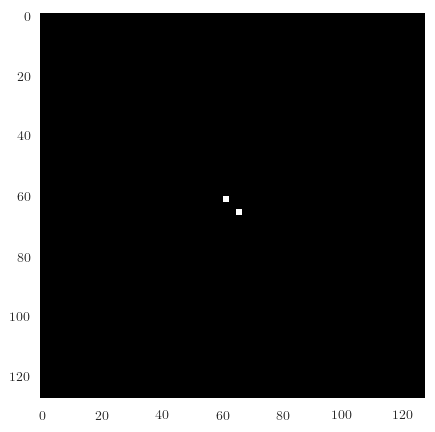

In [183]:
N = 128
Z = Image.new("L", (N, N), color="black")
fftsquare(Z, 0.5, N//2-2, N//2-2, fill="white")
fftsquare(Z, 0.5, N//2+2, N//2+2, fill="white")
Z = np.array(Z, "uint8")

mp.imshow(Z, "gray")
mp.grid(False)
mp.show()

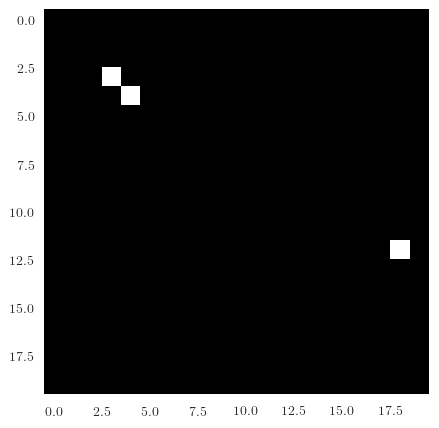

In [188]:
N = 20
G = np.zeros((N,N), "uint8")
x,y = N//2, N//2
G[y-6, x-6] = 1
G[y-7, x-7] = 1
G[y+2, x+8] = 1

mp.imshow(G, "gray")
mp.grid(False)
mp.show()

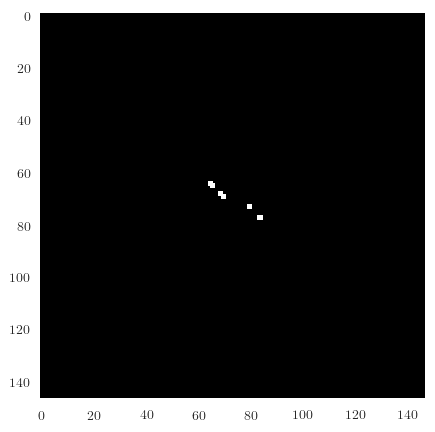

In [189]:
conv = sig.convolve2d(G, Z, "full")
mp.imshow(conv, "gray")
mp.grid(False)
mp.show()

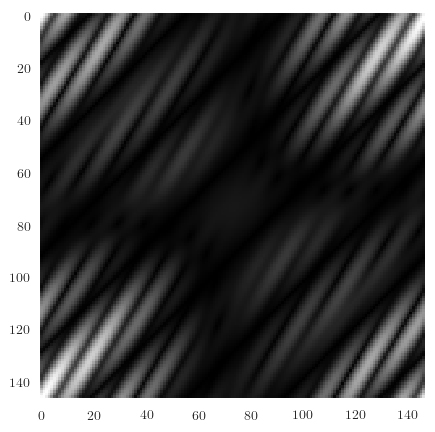

In [191]:
mp.imshow(abs(fft.fft2(conv)), "gray")
mp.grid(False)
mp.show()